In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import data_loading

In [1]:
# !git clone https://github.com/leanhduc123/NLP_Zalo_QA.git zaloqa 
# %cd zaloqa

Cloning into 'zaloqa'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 34 (delta 11), reused 34 (delta 11), pack-reused 0
Unpacking objects: 100% (34/34), done.
Checking out files: 100% (27/27), done.


In [19]:
zalo_loader = data_loading.ZaloLoader()
zalo_data = zalo_loader.read_csv("data/train.csv")
zalo_data = pd.read_csv("data/squad_vi_train_v2.0_ImpossibleAnswer.csv")
zalo_data

,id,question,title,text,answer,label
0,5a8cc8f2fd22b3001a8d8e66,Liên minh dựa trên điều gì?,United_States_dollar,"Không giống như đồng đô la của Tây Ban Nha, đô...",a decimal system of values,True
1,5a8cc8f2fd22b3001a8d8e67,Kho bạc nắm giữ bao nhiêu giá trị tiền tệ?,United_States_dollar,"Không giống như đồng đô la của Tây Ban Nha, đô...",one-tenth of a dollar,True
2,5a8cc8f2fd22b3001a8d8e68,Bao nhiêu là một liên minh sẽ có giá trị như đ...,United_States_dollar,"Không giống như đồng đô la của Tây Ban Nha, đô...",one hundred dollars,True
3,5a8cc8f2fd22b3001a8d8e69,Tiền giấy có giá trị tối đa được sử dụng để có...,United_States_dollar,"Không giống như đồng đô la của Tây Ban Nha, đô...",$20,True
4,5a8cc8f2fd22b3001a8d8e6a,"Trong luật pháp nào thuật ngữ ""giáo phái"" được...",United_States_dollar,"Không giống như đồng đô la của Tây Ban Nha, đô...",Coinage Act of 1792,True
...,...,...,...,...,...,...
43493,5ad3aa82604f3c001a3feb45,Ngày càng có nhiều tranh cãi xung quanh việc t...,Pharmaceutical_industry,Ngày càng có nhiều tranh cãi xung quanh việc t...,'gifts' and biased information,True
43494,5ad3aa82604f3c001a3feb46,Hội nghị đã thuê ai làm tư vấn trả tiền?,Pharmaceutical_industry,Ngày càng có nhiều tranh cãi xung quanh việc t...,physicians,True
43495,5ad3aa82604f3c001a3feb47,Những ấn phẩm có thể được ban cố vấn thường đư...,Pharmaceutical_industry,Ngày càng có nhiều tranh cãi xung quanh việc t...,journals and conferences,True
43496,5ad3aa82604f3c001a3feb48,Ai đã bị buộc tội ảnh hưởng đến tư vấn?,Pharmaceutical_industry,Ngày càng có nhiều tranh cãi xung quanh việc t...,drug reps,True


In [21]:
squad_vn_data = pd.read_csv("data/squad_vi_dev_v2.0_ImpossibleAnswer.csv")
squad_vn_data 

,id,question,title,text,answer,label
0,5a6cb5c14eec6b001a80a624,Dược phẩm không bán được gì?,Pharmacy,Từ dược phẩm có nguồn gốc từ dược phẩm gốc của...,tobacco and patent medicines,True
1,5a6cb5c14eec6b001a80a625,Những từ gốc tiếng Anh có nghĩa là gì?,Pharmacy,Từ dược phẩm có nguồn gốc từ dược phẩm gốc của...,sorcery or even poison,True
2,5a6cb5c14eec6b001a80a626,Những gì khác đã được các dược phẩm tránh?,Pharmacy,Từ dược phẩm có nguồn gốc từ dược phẩm gốc của...,many other herbs not listed,True
3,5a6cb5c14eec6b001a80a628,Thuật ngữ dược phẩm được sử dụng lần cuối tron...,Pharmacy,Từ dược phẩm có nguồn gốc từ dược phẩm gốc của...,15th,True
4,5a6cb66c4eec6b001a80a62e,Những loại chuyên gia làm dược sĩ thiếu?,Pharmacy,Dược sĩ là các chuyên gia chăm sóc sức khỏe vớ...,healthcare professionals,True
...,...,...,...,...,...,...
5940,5ad28a57d7d075001a4299b3,Lực lượng bảo thủ thường gắn liền với việc chu...,Force,Lực lượng bảo thủ bao gồm những gì?,nonconservative forces,True
5941,5ad28ad0d7d075001a4299cc,Điều gì không có một đối tác số liệu?,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,pound-force,True
5942,5ad28ad0d7d075001a4299cd,Điều gì không có một đối tác số liệu?,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,kilogram-force,True
5943,5ad28ad0d7d075001a4299ce,Lực nào dẫn đến một đơn vị khối lượng thường đ...,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,kilogram-force,True


In [7]:
squad_data = pd.read_csv("data/squad-v2.0-mailong25.csv")
squad_data

,id,question,title,text,answer,label
0,37bce7cfc34d4bf9b81e340c5345384c,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,Thủ tướng Ấn Độ sắp sang Mỹ gặp ông Trump mua ...,NaN,True
1,8af074fb95c941b485c120e2ddbcc7c8,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,Narendra Damodardas Modi ( tiếng Gujarat : નરે...,Narendra Damodardas Modi,False
2,4d8ce4afc5ed4364ad70fc4384eff08b,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,- Google hôm 3/6 đã xin lỗi Thủ tướng Ấn Độ Na...,Narendra Modi,False
3,ded17c6beaa746eebe531b3dd2b0f573,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,thủ tướng thăm Ấn Độ Nguyễn Xuân Phúc ASEAN th...,NaN,True
4,4e03f08a78b744a48f0f380441a227f4,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,"Tin tức về chủ đề "" Thủ tướng Ấn Độ Narendra M...",Narendra Modi,False
...,...,...,...,...,...,...
3449,7ae8621ced0b46d682bb4fbc03b0afe4,Người được mệnh danh bà chúa thơ nôm là ai,Người được mệnh danh bà chúa thơ nôm là ai,Bốn chữ BÀ CHÚA THƠ NÔM ở đầu trang chẵn và nố...,NaN,True
3450,b706ddc4a1c8438d99cb67f62ae2b7dd,Người được mệnh danh bà chúa thơ nôm là ai,Người được mệnh danh bà chúa thơ nôm là ai,"Ai là người được mệnh danh là "" Bà Chúa thơ Nô...",NaN,True
3451,fcf5d052ac2247f2b808016974473e82,Người được mệnh danh bà chúa thơ nôm là ai,Người được mệnh danh bà chúa thơ nôm là ai,Câu 1 : Ai được mệnh danh là bà chúa thơ Nôm ?,NaN,True
3452,e89344e6db464adf93287c694263f017,Người được mệnh danh bà chúa thơ nôm là ai,Người được mệnh danh bà chúa thơ nôm là ai,"Hồ Xuân Hương - Ai mệnh danh là "" Bà chúa thơ ...",NaN,True


In [22]:
zalo_data.isna().sum()

id          0
question    2
title       0
text        8
answer      0
label       0
dtype: int64

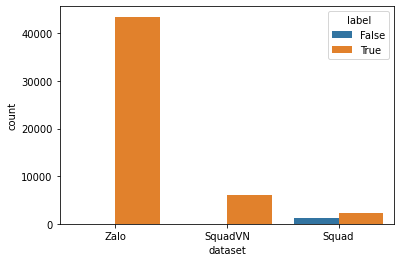

In [23]:
label_count = pd.concat([
    zalo_data.join(pd.Series(np.full(len(zalo_data), 'Zalo'), name='dataset'))[['dataset', 'label']],
    squad_vn_data.join(pd.Series(np.full(len(squad_vn_data), 'SquadVN'), name='dataset'))[['dataset', 'label']],
    squad_data.join(pd.Series(np.full(len(squad_data), 'Squad'), name='dataset'))[['dataset', 'label']]
], axis = 0)
sns.countplot(x='dataset', hue='label', data=label_count)

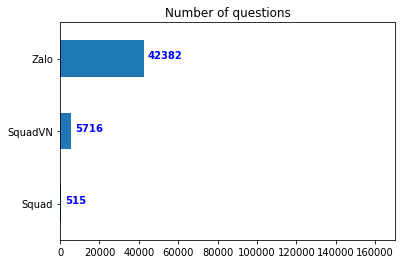

In [24]:
question_count = pd.Series({'Zalo': zalo_data['question'].nunique(),
                            'SquadVN': squad_vn_data['question'].nunique(),
                            'Squad': squad_data['question'].nunique()})
_, ax = plt.subplots()
for i, v in enumerate(question_count):
    ax.text(v + 2000, i, str(v), color='blue', fontweight='bold')
plt.title('Number of questions')
question_count.plot(kind='barh', xlim=(0, 170000)).invert_yaxis()

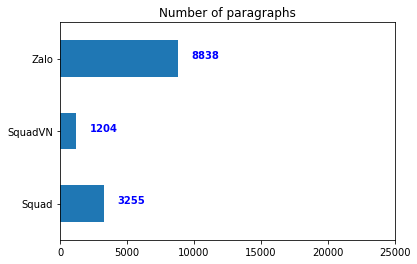

In [25]:
paragraph_count = pd.Series({'Zalo': zalo_data['text'].nunique(),
                            'SquadVN': squad_vn_data['text'].nunique(),
                            'Squad': squad_data['text'].nunique()})
_, ax = plt.subplots()
for i, v in enumerate(paragraph_count):
    ax.text(v + 1000, i, str(v), color='blue', fontweight='bold')
plt.title('Number of paragraphs')
paragraph_count.plot(kind='barh', xlim=(0, 25000)).invert_yaxis()

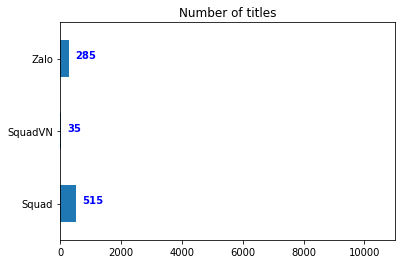

In [26]:
title_count = pd.Series({'Zalo': zalo_data['title'].nunique(),
                         'SquadVN': squad_vn_data['title'].nunique(),
                         'Squad': squad_data['title'].nunique()})
_, ax = plt.subplots()
for i, v in enumerate(title_count):
    ax.text(v + 200, i, str(v), color='blue', fontweight='bold')
plt.title('Number of titles')
title_count.plot(kind='barh', xlim=(0, 11000)).invert_yaxis()

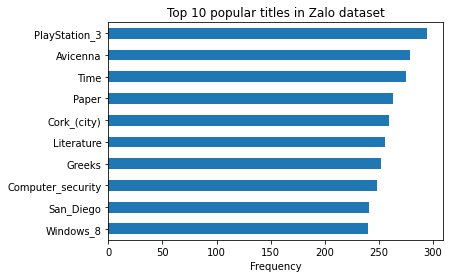

In [27]:
plt.title('Top 10 popular titles in Zalo dataset')
plt.xlabel('Frequency')
zalo_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

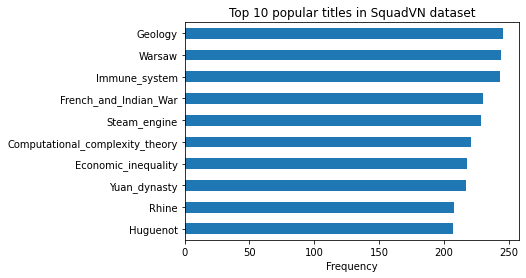

In [28]:
plt.title('Top 10 popular titles in SquadVN dataset')
plt.xlabel('Frequency')
squad_vn_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

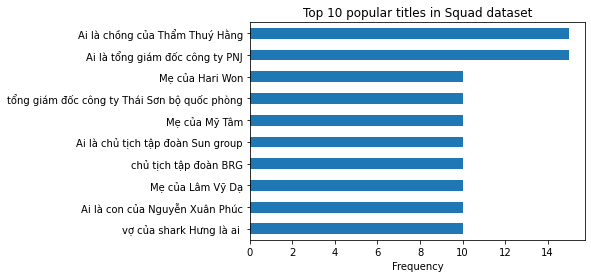

In [29]:
plt.title('Top 10 popular titles in Squad dataset')
plt.xlabel('Frequency')
squad_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

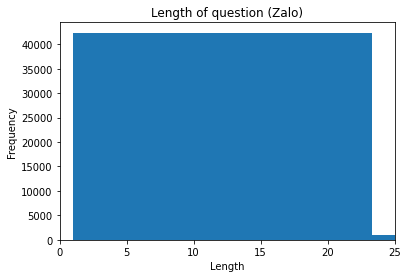

In [30]:
plt.title('Length of question (Zalo)')
plt.xlabel('Length')
zalo_data['question'].str.split(' ').str.len().plot.hist(xlim=(0, 25), bins=20)

In [ ]:
# import tokenizing
# plt.title('Length of question in tokens (Zalo)')
# plt.xlabel('Length')
# zalo_data['question'].apply(tokenizing.tokenize).str.len().plot.hist(xlim=(0, 25), bins=20)

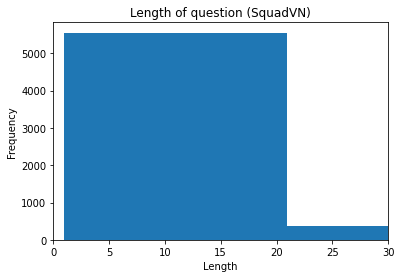

In [32]:
plt.title('Length of question (SquadVN)')
plt.xlabel('Length')
squad_vn_data['question'].str.split(' ').str.len().plot.hist(xlim=(0, 30), bins=20)

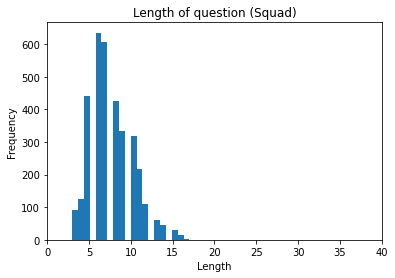

In [33]:
plt.title('Length of question (Squad)')
plt.xlabel('Length')
squad_data['question'].str.split(' ').str.len().plot.hist(xlim=(0, 40), bins=20)

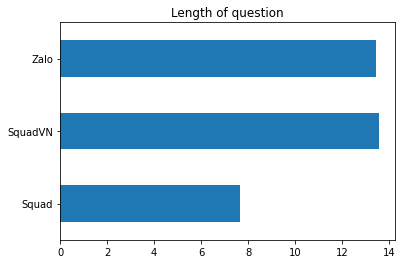

In [34]:
question_len = pd.Series({'Zalo': zalo_data['question'].str.split(' ').str.len().mean(),
                          'SquadVN': squad_vn_data['question'].str.split(' ').str.len().mean(),
                          'Squad': squad_data['question'].str.split(' ').str.len().mean()})
plt.title('Length of question')
question_len.plot(kind='barh').invert_yaxis()

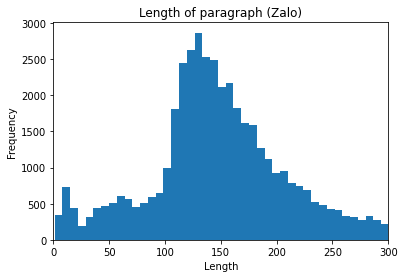

In [35]:
plt.title('Length of paragraph (Zalo)')
plt.xlabel('Length')
zalo_data['text'].str.split(' ').str.len().plot.hist(xlim=(0, 300), bins=100)

In [37]:
# plt.title('Length of paragraph in tokens')
# plt.xlabel('Length')
# zalo_data['text'].apply(tokenizing.tokenize).str.len().plot.hist(xlim=(0, 300), bins=100)

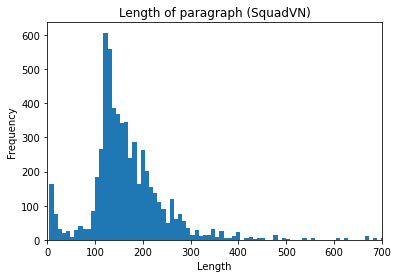

In [38]:
plt.title('Length of paragraph (SquadVN)')
plt.xlabel('Length')
squad_vn_data['text'].str.split(' ').str.len().plot.hist(xlim=(0, 700), bins=100)

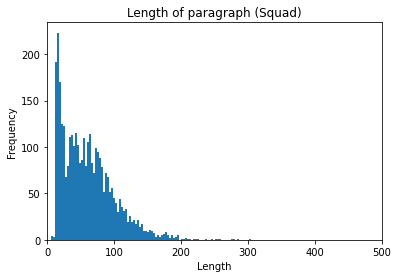

In [39]:
plt.title('Length of paragraph (Squad)')
plt.xlabel('Length')
squad_data['text'].str.split(' ').str.len().plot.hist(xlim=(0, 500), bins=100)

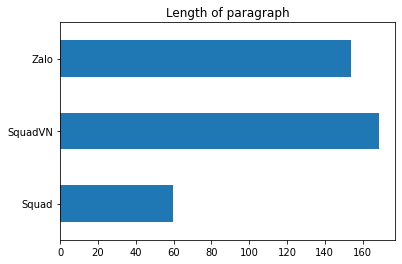

In [40]:
paragraph_len = pd.Series({'Zalo': zalo_data['text'].str.split(' ').str.len().mean(),
                          'SquadVN': squad_vn_data['text'].str.split(' ').str.len().mean(),
                          'Squad': squad_data['text'].str.split(' ').str.len().mean()})
plt.title('Length of paragraph')
paragraph_len.plot(kind='barh').invert_yaxis()

In [42]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


AttributeError: ignored